In [1]:
!pip install download

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

import pandas as pd

from download import download

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False


In [3]:
path = download('https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip', '/tmp/aq', kind="zip")

Creating data folder...

file_sizes: 7.96MB [00:00, 32.8MB/s]
Extracting zip file...
Successfully downloaded / unzipped to /tmp/aq


In [5]:
def convert_to_date(x):
	return datetime.strptime(x, '%Y %m %d %H')

In [6]:
aq_df = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date)

/tmp/ipython-input-3805277565.py:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  aq_df = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date)
/tmp/ipython-input-3805277565.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  aq_df = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date)


In [4]:
!ls -alrt /tmp/aq/PRSA_Data_20130301-20170228

total 31780
drwxr-xr-x 3 root root    4096 Oct 28 03:57 ..
-rw-r--r-- 1 root root 2835916 Oct 28 03:57 PRSA_Data_Aotizhongxin_20130301-20170228.csv
-rw-r--r-- 1 root root 2722295 Oct 28 03:57 PRSA_Data_Changping_20130301-20170228.csv
-rw-r--r-- 1 root root 2675856 Oct 28 03:57 PRSA_Data_Dingling_20130301-20170228.csv
-rw-r--r-- 1 root root 2636684 Oct 28 03:57 PRSA_Data_Dongsi_20130301-20170228.csv
-rw-r--r-- 1 root root 2695860 Oct 28 03:57 PRSA_Data_Guanyuan_20130301-20170228.csv
-rw-r--r-- 1 root root 2654625 Oct 28 03:57 PRSA_Data_Gucheng_20130301-20170228.csv
-rw-r--r-- 1 root root 2641027 Oct 28 03:57 PRSA_Data_Huairou_20130301-20170228.csv
-rw-r--r-- 1 root root 2839705 Oct 28 03:57 PRSA_Data_Nongzhanguan_20130301-20170228.csv
-rw-r--r-- 1 root root 2620654 Oct 28 03:57 PRSA_Data_Shunyi_20130301-20170228.csv
-rw-r--r-- 1 root root 2655061 Oct 28 03:57 PRSA_Data_Tiantan_20130301-20170228.csv
-rw-r--r-- 1 root root 2659544 Oct 28 03:57 PRSA_Data_Wanliu_20130301-20170228.csv
drwxr-

In [7]:
aq_df.head()

,year_month_day_hour,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2013-03-01 01:00:00,2,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,2013-03-01 02:00:00,3,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,2013-03-01 03:00:00,4,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,2013-03-01 04:00:00,5,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

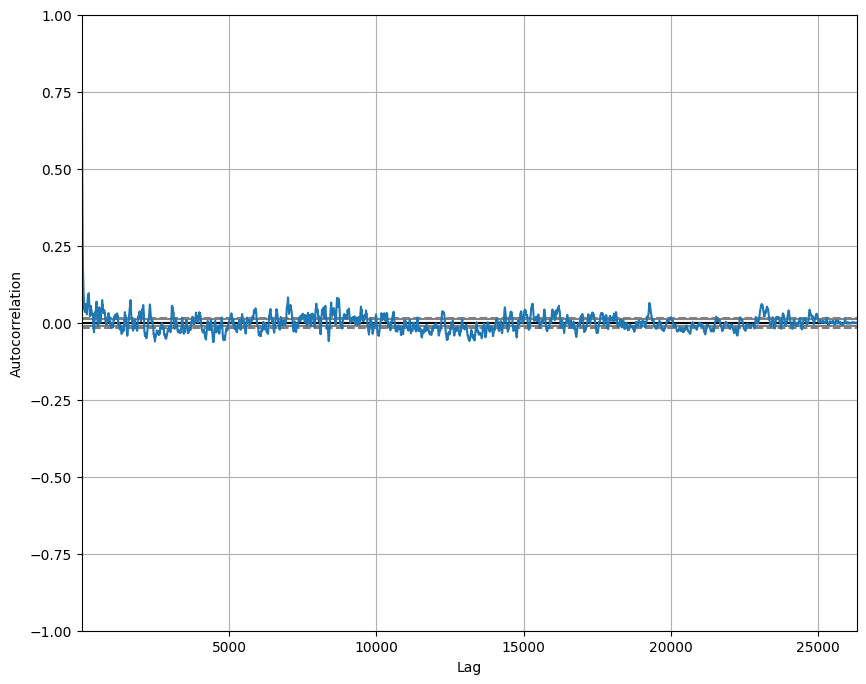

In [19]:
aq_df = aq_df.set_index('year_month_day_hour')
pd.plotting.autocorrelation_plot(aq_df['2014':'2016']['PM2.5'])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

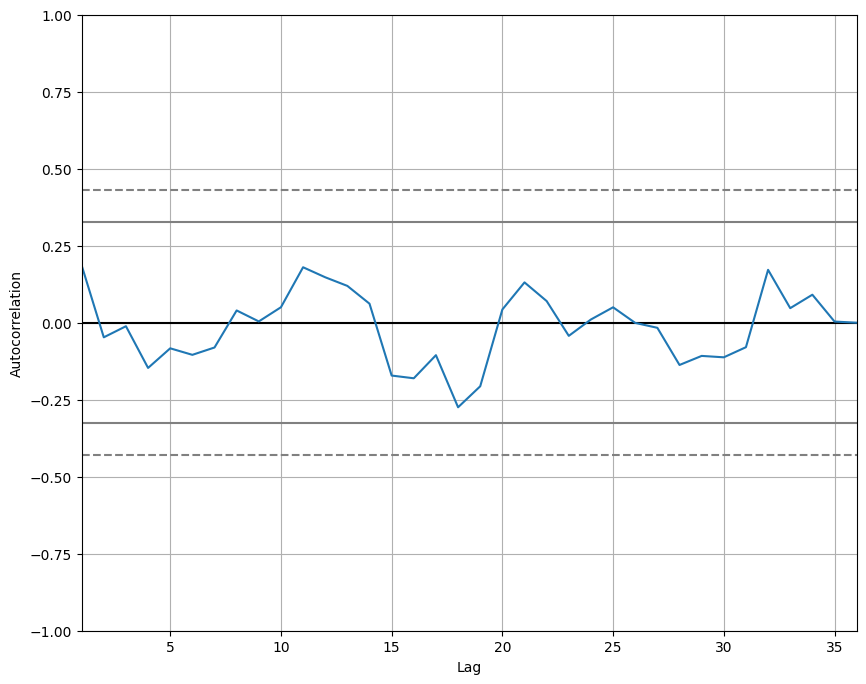

In [22]:
pd.plotting.autocorrelation_plot(aq_df['2014':'2016']['PM2.5'].resample("1m").mean())

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False


Null hypothesis - Series is stationary

Alternate hypothesis - Series is not stationary

In [12]:
aq_df = aq_df.ffill()

In [13]:
from statsmodels.tsa.stattools import kpss

In [14]:
stats, p, lags, critical_values = kpss(aq_df['PM2.5'], 'ct')

/tmp/ipython-input-260205561.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stats, p, lags, critical_values = kpss(aq_df['PM2.5'], 'ct')


In [15]:
print(f'Test Statistics: {stats}')
print(f'p-value: {p}')
print(f'Critial Values: {critical_values}')

if p < 0.05 :
  print('Series is not Stationary')
else:
  print('Series is Stationary')


Test Statistics: 0.10625554828198415
p-value: 0.1
Critial Values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Series is Stationary


Null Hypothesis - Series possesses a unit root and hence is not stationary

Alternate Hypothesis - Series is stationary

In [16]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(aq_df['PM2.5'])

In [17]:
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critial Values: {result[4]}')

if result[1] > 0.05 :
  print('Series is not Stationary')
else:
  print('Series is Stationary')

Test Statistics: -18.892634944466074
p-value: 0.0
Critial Values: {'1%': np.float64(-3.43053678680168), '5%': np.float64(-2.861622555151452), '10%': np.float64(-2.5668139415123283)}
Series is Stationary
